### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [313]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t', index_col=0)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [315]:
df.describe(include= 'all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3107,3105,3099
unique,502,NaN,5,5,1426,3032,2814,3047
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [316]:
df_final = df[['rating', 'effectiveness', 'sideEffects']]

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [317]:
pd.get_dummies(df['sideEffects'])

,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
2202,0,1,0,0,0
3117,0,0,0,0,1
1146,0,0,0,1,0
3947,0,1,0,0,0
1951,0,0,0,0,1
...,...,...,...,...,...
1039,0,1,0,0,0
3281,1,0,0,0,0
1664,0,0,1,0,0
2621,0,1,0,0,0


In [318]:
df_final['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [319]:
effectiveness_dict = {'Highly Effective': 4, 'Marginally Effective': 1, 'Ineffective': 0,
       'Considerably Effective': 3, 'Moderately Effective': 2}

In [320]:
df_final['effectiveness'] = df_final['effectiveness'].map(effectiveness_dict)

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [321]:
df_final['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [322]:
side_effects_dict = {'Mild Side Effects': 1, 'Severe Side Effects': 3, 'No Side Effects': 0,
       'Extremely Severe Side Effects': 4, 'Moderate Side Effects': 2}

In [323]:
df_final['sideEffects'] = df_final['sideEffects'].map(side_effects_dict)

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [324]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [325]:
X = df_final

In [326]:
inertias = []
ks = np.arange(2, 11)

for k in ks:
    clustering = KMeans(n_clusters= k, random_state= 42)
    clustering.fit(X)
    inertias.append(clustering.inertia_)

In [327]:
df_inertias = pd.DataFrame({'inertias': inertias, 'ks': ks})

In [328]:
df_inertias['diff'] = df_inertias['inertias'] - df_inertias['inertias'].shift(1)

In [329]:
df_inertias

,inertias,ks,diff
0,11137.736724,2,NaN
1,7254.022835,3,-3883.713888
2,5691.624714,4,-1562.398121
3,4805.423333,5,-886.201382
4,4233.709968,6,-571.713365
5,3775.656022,7,-458.053946
6,3312.184647,8,-463.471375
7,2984.567361,9,-327.617286
8,2841.815549,10,-142.751813


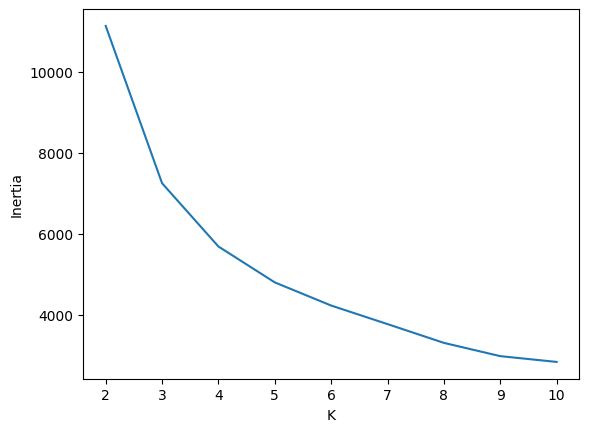

In [330]:
plt.plot(ks, inertias)
plt.xlabel('K')
plt.ylabel('Inertia');

In [284]:
silhouette_scores = []
ks = np.arange(2, 11)

for k in ks:
    clustering = KMeans(n_clusters= k, random_state= 42)
    clustering.fit(X)
    silhouette_scores.append(silhouette_score(X, clustering.predict(X)))

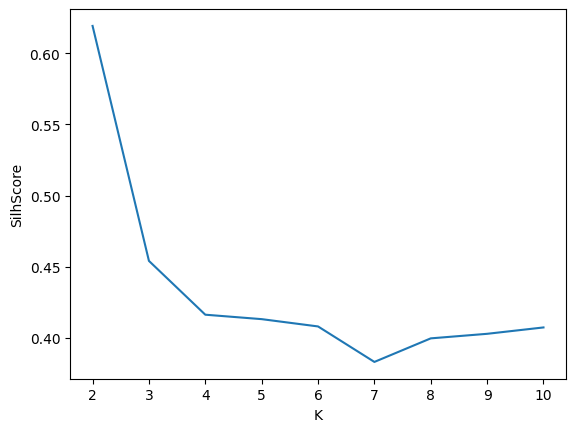

In [285]:
plt.plot(ks, silhouette_scores)
plt.xlabel('K')
plt.ylabel('SilhScore');

In [286]:
df_silh_score = pd.DataFrame({'SilhScore': silhouette_scores, 'ks': ks})

In [287]:
df_silh_score

,SilhScore,ks
0,0.619097,2
1,0.454167,3
2,0.416400,4
3,0.413284,5
4,0.408160,6
5,0.383255,7
6,0.399793,8
7,0.402988,9
8,0.407459,10


#### Genera el K Means 

In [290]:
clustering = KMeans(n_clusters= 2, random_state= 42)
y_pred = clustering.fit_predict(X)

In [291]:
df_final['class'] = y_pred

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [292]:
df_final

,rating,effectiveness,sideEffects,class
2202,4,4,1,0
3117,1,4,3,0
1146,10,4,0,1
3947,3,1,1,0
1951,2,1,3,0
...,...,...,...,...
1039,10,4,1,1
3281,1,0,4,0
1664,2,1,2,0
2621,8,3,1,1


In [293]:
df_final['class'].value_counts()

1    2284
0     823
Name: class, dtype: int64

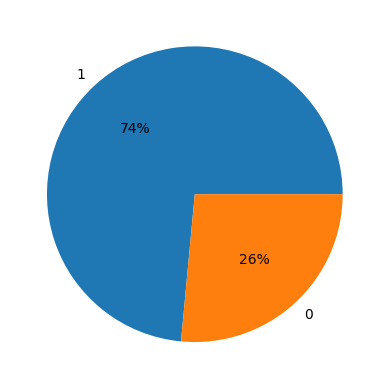

In [294]:
plt.pie(df_final['class'].value_counts(), labels=['1', '0'], autopct='%.0f%%');

In [295]:
df_final.groupby('class').mean()

,rating,effectiveness,sideEffects
class,,,
0,2.667072,1.584447,2.482382
1,8.569615,3.422504,0.880473


In [296]:
class_dict = {0: 'Bad Drugs', 1: 'Good Drugs'}

In [297]:
df_final['class_label'] = df_final['class'].map(class_dict)

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [298]:
df_final

,rating,effectiveness,sideEffects,class,class_label
2202,4,4,1,0,Bad Drugs
3117,1,4,3,0,Bad Drugs
1146,10,4,0,1,Good Drugs
3947,3,1,1,0,Bad Drugs
1951,2,1,3,0,Bad Drugs
...,...,...,...,...,...
1039,10,4,1,1,Good Drugs
3281,1,0,4,0,Bad Drugs
1664,2,1,2,0,Bad Drugs
2621,8,3,1,1,Good Drugs


In [300]:
df_final['rating'] = np.where(df_final['class'] == 0, df_final['rating'] - 5, df_final['rating'])
x = df_final['rating']
y = df_final['effectiveness']
z = df_final['sideEffects']

import plotly.express as px
fig = px.scatter_3d(df_final, x=x, y=y, z=z, range_x = (-5, 12), range_y = (0, 5), range_z= (0, 5),
              color='class')
fig.show()

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

